#Case study On Human Activity Recognision
        

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/human activity"

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/human activity/HAR/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/content/drive/MyDrive/human activity/HAR/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [ ]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [ ]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [ ]:
X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagenergy,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.

In [ ]:
X_test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagenergy,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.993471,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.997610,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.999269,-0.978222,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.27029

# Let's model with our data
**Labels that are useful in plotting confusion matriX**

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Function to plot the confusion matrix

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generic function to run any model specified

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

# Method to print the gridsearch Attributes

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   24.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:28.650843


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012792


---------------------
|      Accuracy      |
---------------------

    0.9589412962334578


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  15 517   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  22   1 448]]


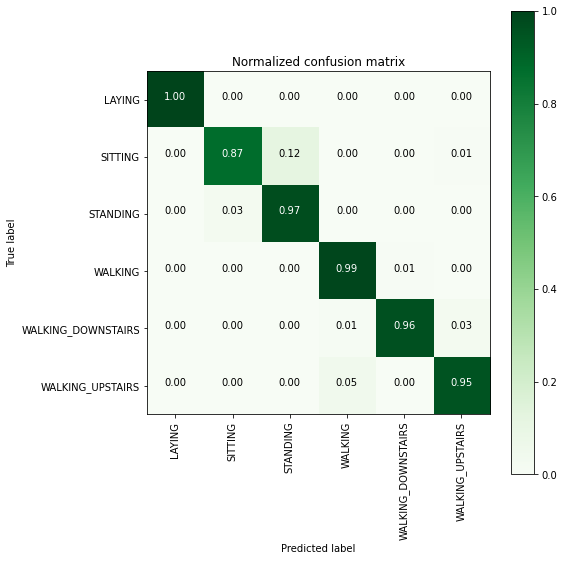

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


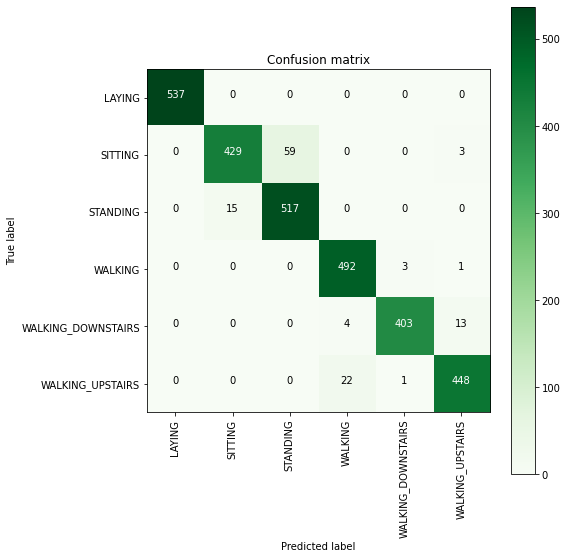

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9358015748118914



# 2. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:01:36.128509


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011325


---------------------
|      Accuracy      |
---------------------

    0.9674244994910078


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 433  53   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


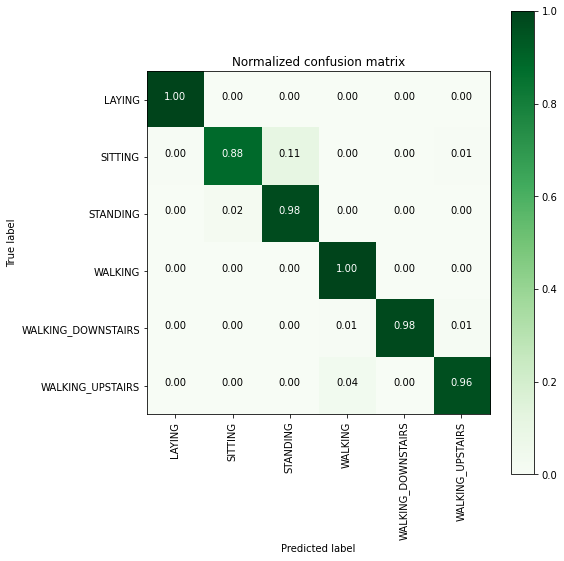

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.941656608258531



# 3. Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:14:21.280483


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.084568


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


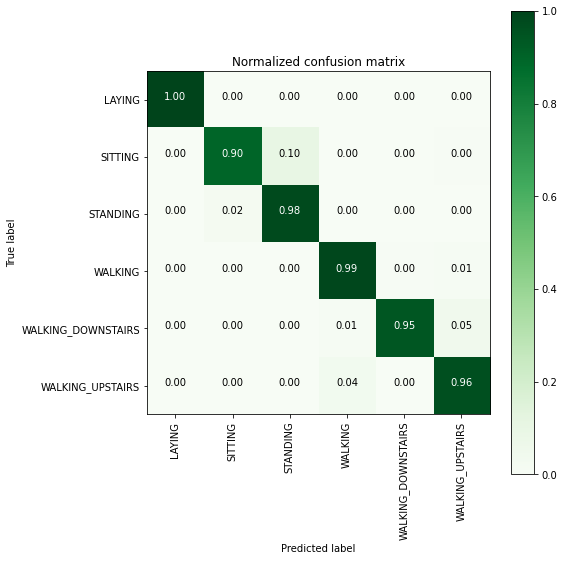

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.980165


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006243


---------------------
|      Accuracy      |
---------------------

    0.8649474041398032


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 388 103   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  14 345  61]
 [  0   0   0  78  24 369]]


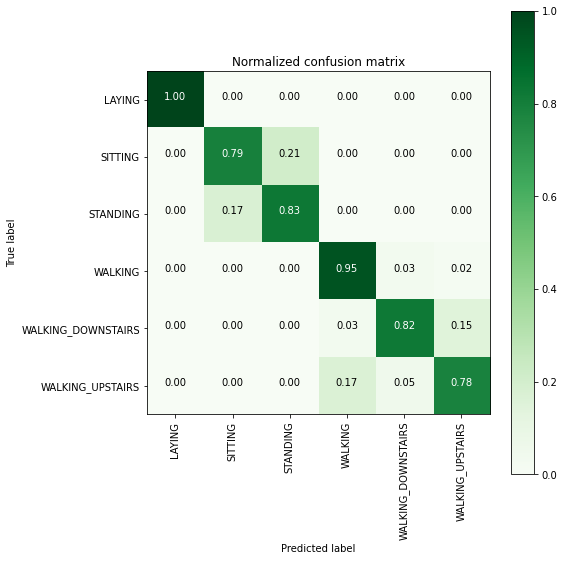

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
          

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:24:46.203128


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.020188


---------------------
|      Accuracy      |
---------------------

    0.9178825924669155


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 422  69   0   0   0]
 [  0  46 486   0   0   0]
 [  0   0   0 478   9   9]
 [  0   0   0  24 356  40]
 [  0   0   0  38   7 426]]


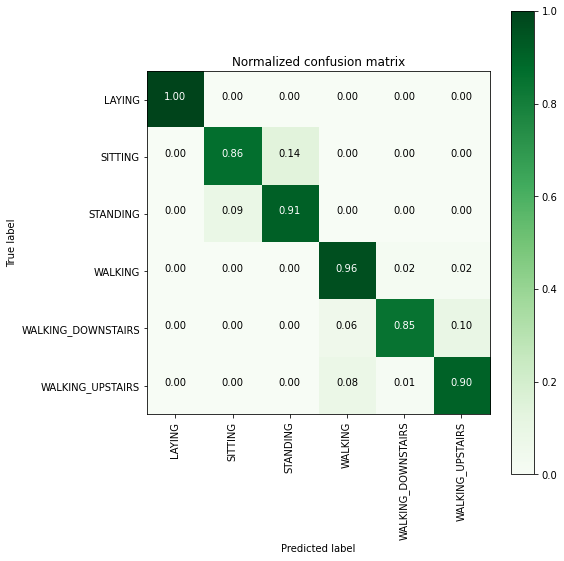

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.91      0.89       532
           WALKING       0.89      0.96      0.92       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6. Gradient Boosted Decision Trees With GridSearch¶

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:28:03.653432


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.058843


---------------------
|      Accuracy      |
---------------------

    0.9222938581608415


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 396  93   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


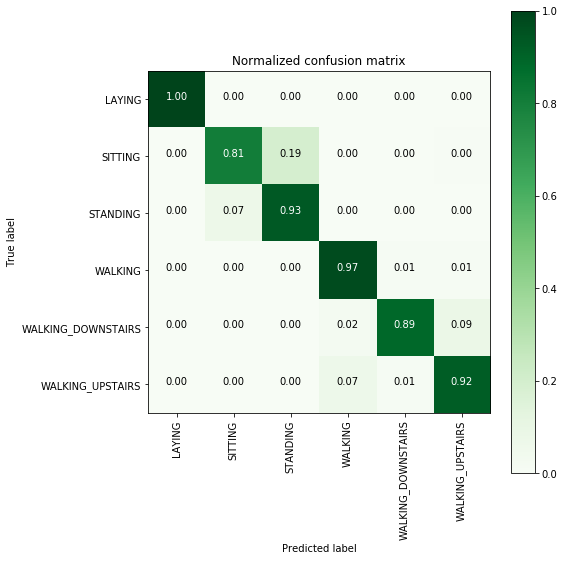

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. Comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.61%       3.393% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.43%      13.57% 
Random Forest       : 91.31%      8.687% 
GradientBoosting DT : 91.31%      8.687% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

#Conclusion :
- By above we can predict that data is linear that'why it performing very good at LInear and logistic.

#Deep learning Models 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

#Data

In [5]:
# Data directory
DATADIR = '/content/drive/MyDrive/human activity/HAR/UCI_HAR_Dataset'

In [6]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [7]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/human activity/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [8]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/MyDrive/human activity/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [9]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [10]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [11]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [12]:
# Import Keras
from tensorflow.python.keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph (), config=session_conf)
K.set_session(sess)

In [13]:

from tensorflow.python.keras import backend as K
K.set_session

<function tensorflow.python.keras.backend.set_session>

In [14]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [15]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [16]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [17]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [18]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 24s 48ms/step - loss: 1.2052 - accuracy: 0.4944 - val_loss: 0.9226 - val_accuracy: 0.5945
Epoch 2/30
460/460 [==============================] - 22s 48ms/step - loss: 0.8041 - accuracy: 0.6500 - val_loss: 0.7612 - val_accuracy: 0.6841
Epoch 3/30
460/460 [==============================] - 22s 47ms/step - loss: 0.6805 - accuracy: 0.7203 - val_loss: 0.6757 - val_accuracy: 0.7418
Epoch 4/30
460/460 [==============================] - 22s 47ms/step - loss: 0.5312 - accuracy: 0.8111 - val_loss: 0.7307 - val_accuracy: 0.7608
Epoch 5/30
460/460 [==============================] - 22s 47ms/step - loss: 0.3963 - accuracy: 0.8723 - val_loss: 0.4535 - val_accuracy: 0.8585
Epoch 6/30
460/460 [==============================] - 22s 48ms/step - loss: 0.3088 - accuracy: 0.9101 - val_loss: 0.4747 - val_accuracy: 0.8504
Epoch 7/30
460/460 [==============================] - 22s 48ms/step - loss: 0.2765 - accuracy: 0.9189 - val_loss: 0.4399 - val_accuracy:

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                 0
SITTING                  3      408  ...                   1                 2
STANDING                 0       83  ...                   0                 1
WALKING                  0        0  ...                  24                25
WALKING_DOWNSTAIRS       0        0  ...                 420                 0
WALKING_UPSTAIRS         0        0  ...                  33               437

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 1s 12ms/step - loss: 0.6416 - accuracy: 0.9053


In [ ]:
score

[0.6415585875511169, 0.9053274393081665]

# Assignment:
- With a simple 2 layer architecture we got 90.09% accuracy and a loss of 0.30
- We can further imporve the performace with Hyperparameter tuning

In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

#Model-1:
- epoch = 30
- n_hidden = 16
- batch_size = 64
- loss = 'categorical_crossentropy'
- optimizer = 'rmsprop'

In [ ]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 64

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                18944     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 29s 58ms/step - loss: 1.0358 - accuracy: 0.5564 - val_loss: 0.9567 - val_accuracy: 0.6169
Epoch 2/30
460/460 [==============================] - 27s 58ms/step - loss: 0.6415 - accuracy: 0.7489 - val_loss: 0.6701 - val_accuracy: 0.7818
Epoch 3/30
460/460 [==============================] - 27s 58ms/step - loss: 0.4239 - accuracy: 0.8658 - val_loss: 0.5464 - val_accuracy: 0.8327
Epoch 4/30
460/460 [==============================] - 27s 58ms/step - loss: 0.2614 - accuracy: 0.9153 - val_loss: 0.4361 - val_accuracy: 0.8789
Epoch 5/30
460/460 [==============================] - 27s 58ms/step - loss: 0.2417 - accuracy: 0.9210 - val_loss: 0.4237 - val_accuracy: 0.8785
Epoch 6/30
460/460 [==============================] - 27s 58ms/step - loss: 0.2023 - accuracy: 0.9336 - val_loss: 0.3130 - val_accuracy: 0.8748
Epoch 7/30
460/460 [==============================] - 27s 58ms/step - loss: 0.2005 - accuracy: 0.9320 - val_loss: 0.3183 - val_accuracy:

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                 0
SITTING                  0      373  ...                   0                 3
STANDING                 0       79  ...                   0                 0
WALKING                  0        0  ...                  25                 6
WALKING_DOWNSTAIRS       0        0  ...                 418                 2
WALKING_UPSTAIRS         0        0  ...                   0               469

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 2s 17ms/step - loss: 0.4214 - accuracy: 0.9121


In [ ]:
score

[0.4214465320110321, 0.9121140241622925]

#Model-2:
- epoch = 20
- n_hidden = 128
- batch_size = 64
- activation = {input : Default ,   output:softmax}
- loss = 'categorical_crossentropy'
- optimizer = 'rmsprop'

In [ ]:
# Initializing parameters
epochs = 20
batch_size = 64
n_hidden = 128

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 128)               70656     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 774       
Total params: 71,430
Trainable params: 71,430
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/20
115/115 [==============================] - 24s 193ms/step - loss: 1.1855 - accuracy: 0.4984 - val_loss: 0.9466 - val_accuracy: 0.6183
Epoch 2/20
115/115 [==============================] - 22s 188ms/step - loss: 0.7834 - accuracy: 0.6761 - val_loss: 0.9503 - val_accuracy: 0.6634
Epoch 3/20
115/115 [==============================] - 22s 187ms/step - loss: 0.5472 - accuracy: 0.7945 - val_loss: 0.5937 - val_accuracy: 0.7747
Epoch 4/20
115/115 [==============================] - 22s 187ms/step - loss: 0.3809 - accuracy: 0.8689 - val_loss: 0.4690 - val_accuracy: 0.8405
Epoch 5/20
115/115 [==============================] - 22s 187ms/step - loss: 0.2794 - accuracy: 0.9082 - val_loss: 0.5325 - val_accuracy: 0.8300
Epoch 6/20
115/115 [==============================] - 21s 187ms/step - loss: 0.2312 - accuracy: 0.9197 - val_loss: 0.3784 - val_accuracy: 0.8741
Epoch 7/20
115/115 [==============================] - 22s 187ms/step - loss: 0.2003 - accuracy: 0.9285 - val_loss: 0.2904 - val_ac

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                 2
SITTING                  5      376  ...                   0                 1
STANDING                 0       85  ...                   0                 0
WALKING                  0        0  ...                  36                 1
WALKING_DOWNSTAIRS       0        0  ...                 417                 0
WALKING_UPSTAIRS         0        0  ...                  35               433

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 4s 38ms/step - loss: 0.3724 - accuracy: 0.8965


In [ ]:
score

[0.3723759353160858, 0.8965049386024475]

#Model-3:
- epoch = 30
- n_hidden = 32
- batch_size = 64
- loss = 'categorical_crossentropy'
- optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
- Adding one batch normalization layer

In [19]:
## Initializing parameters
epochs = 30
batch_size = 64
n_hidden = 32

In [21]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,702
Trainable params: 5,638
Non-trainable params: 64
_________________________________________________________________


In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
115/115 [==============================] - 8s 54ms/step - loss: 1.5567 - accuracy: 0.4115 - val_loss: 1.4866 - val_accuracy: 0.4615
Epoch 2/30
115/115 [==============================] - 6s 49ms/step - loss: 1.1898 - accuracy: 0.5106 - val_loss: 1.2515 - val_accuracy: 0.4859
Epoch 3/30
115/115 [==============================] - 6s 49ms/step - loss: 1.0750 - accuracy: 0.5516 - val_loss: 1.1363 - val_accuracy: 0.5402
Epoch 4/30
115/115 [==============================] - 6s 51ms/step - loss: 1.0050 - accuracy: 0.5789 - val_loss: 1.0256 - val_accuracy: 0.5494
Epoch 5/30
115/115 [==============================] - 6s 49ms/step - loss: 0.9259 - accuracy: 0.5979 - val_loss: 1.2384 - val_accuracy: 0.4971
Epoch 6/30
115/115 [==============================] - 6s 49ms/step - loss: 0.8653 - accuracy: 0.6179 - val_loss: 1.0599 - val_accuracy: 0.4930
Epoch 7/30
115/115 [==============================] - 6s 50ms/step - loss: 0.8029 - accuracy: 0.6532 - val_loss: 0.7357 - val_accuracy: 0.6895

In [24]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      379  ...                   0                 2
STANDING                 0       92  ...                   0                 0
WALKING                  0        1  ...                  27                 9
WALKING_DOWNSTAIRS       0        0  ...                 409                 8
WALKING_UPSTAIRS         0        0  ...                  44               377

[6 rows x 6 columns]


In [25]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 1s 11ms/step - loss: 0.3334 - accuracy: 0.8806


In [26]:
score

[0.3334100842475891, 0.8805565237998962]

#Model-4:
- epoch = 30
- n_hidden = 64 , 32
- batch_size = 16
- loss = 'categorical_crossentropy'
- optimizer = 'Adam'
- Adding One BAtch normalization.

In [27]:
# update LSTM layers
n_hidden_1 = 64
n_hidden_2 = 32

In [28]:
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# 1. You need to set return_sequences=True from first LSTM
# 2. You need to set return_sequences=True from second LSTM
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Configuring the parameters
model.add(LSTM(n_hidden_2 , return_sequences=False))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 31,814
Trainable params: 31,686
Non-trainable params: 128
________________________________________________

In [29]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.Adam(0.0005, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
115/115 [==============================] - 22s 163ms/step - loss: 1.1602 - accuracy: 0.5660 - val_loss: 1.3972 - val_accuracy: 0.3750
Epoch 2/30
115/115 [==============================] - 18s 156ms/step - loss: 0.7502 - accuracy: 0.7270 - val_loss: 0.8489 - val_accuracy: 0.6427
Epoch 3/30
115/115 [==============================] - 18s 156ms/step - loss: 0.5790 - accuracy: 0.7962 - val_loss: 0.9937 - val_accuracy: 0.6614
Epoch 4/30
115/115 [==============================] - 18s 154ms/step - loss: 0.4241 - accuracy: 0.8679 - val_loss: 0.5855 - val_accuracy: 0.8012
Epoch 5/30
115/115 [==============================] - 18s 155ms/step - loss: 0.3363 - accuracy: 0.9003 - val_loss: 0.6541 - val_accuracy: 0.7516
Epoch 6/30
115/115 [==============================] - 18s 155ms/step - loss: 0.2796 - accuracy: 0.9195 - val_loss: 0.3115 - val_accuracy: 0.9026
Epoch 7/30
115/115 [==============================] - 18s 153ms/step - loss: 0.2645 - accuracy: 0.9162 - val_loss: 0.5718 - val_ac

In [31]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  5      422  ...                   0                21
STANDING                 0      150  ...                   0                 0
WALKING                  0        0  ...                  14                 3
WALKING_DOWNSTAIRS       0        0  ...                 420                 0
WALKING_UPSTAIRS         0        0  ...                  19               451

[6 rows x 6 columns]


In [32]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 2s 25ms/step - loss: 0.2440 - accuracy: 0.9131


In [33]:
score

[0.24404112994670868, 0.9131320118904114]

#Model-5:
- epoch = 30
- n_hidden = 32 , 16
- batch_size = 16
- loss = 'categorical_crossentropy'
- optimizer = 'rmsprop'

In [ ]:
# update LSTM layers
n_hidden_1 = 32
n_hidden_2 = 16
batch_size = 16

In [ ]:
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# 1. You need to set return_sequences=True from first LSTM
# 2. You need to set return_sequences=True from second LSTM
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(Dropout(0.5))
# Configuring the parameters
model.add(LSTM(n_hidden_2 , return_sequences=False))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
dropout_25 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 102       
Total params: 8,614
Trainable params: 8,614
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/20
460/460 [==============================] - 45s 91ms/step - loss: 1.1488 - accuracy: 0.5291 - val_loss: 0.8136 - val_accuracy: 0.6770
Epoch 2/20
460/460 [==============================] - 40s 88ms/step - loss: 0.7547 - accuracy: 0.7008 - val_loss: 0.6168 - val_accuracy: 0.7455
Epoch 3/20
460/460 [==============================] - 41s 88ms/step - loss: 0.5811 - accuracy: 0.8051 - val_loss: 0.4739 - val_accuracy: 0.8507
Epoch 4/20
460/460 [==============================] - 41s 89ms/step - loss: 0.4186 - accuracy: 0.8740 - val_loss: 0.4401 - val_accuracy: 0.8772
Epoch 5/20
460/460 [==============================] - 41s 89ms/step - loss: 0.3902 - accuracy: 0.8779 - val_loss: 0.5750 - val_accuracy: 0.7574
Epoch 6/20
460/460 [==============================] - 41s 89ms/step - loss: 0.4751 - accuracy: 0.8126 - val_loss: 0.4390 - val_accuracy: 0.8633
Epoch 7/20
460/460 [==============================] - 40s 88ms/step - loss: 0.3983 - accuracy: 0.8883 - val_loss: 0.7133 - val_accuracy:

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      418  ...                   0                10
STANDING                 0      120  ...                   0                 0
WALKING                  0        0  ...                  23                17
WALKING_DOWNSTAIRS       0        0  ...                 418                 1
WALKING_UPSTAIRS         0        0  ...                  12               447

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 2s 20ms/step - loss: 0.2809 - accuracy: 0.9121


In [ ]:
score

[0.28092312812805176, 0.9121140241622925]

#Model-6:
- epoch = 20
- n_hidden = 128 , 64
- batch_size = 256
- loss = 'categorical_crossentropy'
- optimizer = 'Adam'

In [ ]:
# update LSTM layers
n_hidden_1 = 128
n_hidden_2 = 64
batch_size = 256

In [ ]:
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# 1. You need to set return_sequences=True from first LSTM
# 2. You need to set return_sequences=True from second LSTM
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim), return_sequences=True))
# Adding a dropout layer
model.add(Dropout(0.6))
# Configuring the parameters
model.add(LSTM(n_hidden_2 , return_sequences=False))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 120,454
Trainable params: 120,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=20)

Epoch 1/20
29/29 [==============================] - 32s 968ms/step - loss: 1.3332 - accuracy: 0.4389 - val_loss: 1.1228 - val_accuracy: 0.5049
Epoch 2/20
29/29 [==============================] - 27s 932ms/step - loss: 0.9321 - accuracy: 0.6151 - val_loss: 0.8980 - val_accuracy: 0.6518
Epoch 3/20
29/29 [==============================] - 27s 934ms/step - loss: 0.7369 - accuracy: 0.7029 - val_loss: 0.7856 - val_accuracy: 0.6922
Epoch 4/20
29/29 [==============================] - 27s 928ms/step - loss: 0.6291 - accuracy: 0.7410 - val_loss: 0.7045 - val_accuracy: 0.7241
Epoch 5/20
29/29 [==============================] - 27s 940ms/step - loss: 0.4991 - accuracy: 0.8063 - val_loss: 0.5856 - val_accuracy: 0.7886
Epoch 6/20
29/29 [==============================] - 27s 940ms/step - loss: 0.4101 - accuracy: 0.8572 - val_loss: 0.5417 - val_accuracy: 0.8219
Epoch 7/20
29/29 [==============================] - 27s 947ms/step - loss: 0.3042 - accuracy: 0.9008 - val_loss: 0.5951 - val_accuracy: 0.8239

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  2      368  ...                   0                 2
STANDING                 0       63  ...                   0                 1
WALKING                  0        0  ...                  28                 3
WALKING_DOWNSTAIRS       0        0  ...                 410                 1
WALKING_UPSTAIRS         0        0  ...                  17               437

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 5s 58ms/step - loss: 0.2949 - accuracy: 0.9108


In [ ]:
score

[0.2948751449584961, 0.9107567071914673]

#Model-7:
- epoch = 20
- n_hidden = 512 , 256 
- batch_size = 512
- loss = 'categorical_crossentropy'
- optimizer = 'Adam'

In [ ]:
# update LSTM layers
n_hidden_1 = 512
n_hidden_2 = 256
batch_size = 512

In [ ]:
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# 1. You need to set return_sequences=True from first LSTM
# 2. You need to set return_sequences=True from second LSTM
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim), return_sequences=True))
# Adding a dropout layer
model.add(Dropout(0.6))
# Configuring the parameters
model.add(LSTM(n_hidden_2 , return_sequences=False))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 512)          1069056   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 512)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 1,858,054
Trainable params: 1,858,054
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=20)

Epoch 1/20
15/15 [==============================] - 264s 17s/step - loss: 1.3032 - accuracy: 0.4433 - val_loss: 1.1563 - val_accuracy: 0.5066
Epoch 2/20
15/15 [==============================] - 260s 17s/step - loss: 1.1422 - accuracy: 0.5356 - val_loss: 0.9419 - val_accuracy: 0.6166
Epoch 3/20
15/15 [==============================] - 260s 17s/step - loss: 0.8882 - accuracy: 0.6328 - val_loss: 0.8513 - val_accuracy: 0.6237
Epoch 4/20
15/15 [==============================] - 259s 17s/step - loss: 0.7096 - accuracy: 0.7100 - val_loss: 1.0001 - val_accuracy: 0.6481
Epoch 5/20
15/15 [==============================] - 258s 17s/step - loss: 0.6903 - accuracy: 0.7243 - val_loss: 0.6605 - val_accuracy: 0.7428
Epoch 6/20
15/15 [==============================] - 259s 17s/step - loss: 0.5911 - accuracy: 0.7504 - val_loss: 0.7099 - val_accuracy: 0.7139
Epoch 7/20
15/15 [==============================] - 260s 17s/step - loss: 0.7002 - accuracy: 0.7320 - val_loss: 0.6773 - val_accuracy: 0.7136
Epoch 

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                27
SITTING                  0      363  ...                   0                24
STANDING                 0       62  ...                   0                 1
WALKING                  0        0  ...                   0                46
WALKING_DOWNSTAIRS       0        0  ...                 393                27
WALKING_UPSTAIRS         0        0  ...                  21               446

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 41s 441ms/step - loss: 0.3825 - accuracy: 0.8914


#Model-8:
- epoch = 30
- n_hidden = 128 
- batch_size = 16
- loss = 'categorical_crossentropy'
- optimizer = 'rmsprop'
- Here we are using batch normalization layer

In [ ]:
n_hidden_1 = 128
batch_size = 16
epoch = 30

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim)))#, return_sequences=True
# Adding BatchNormalization
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               70656     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 774       
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Epoch 1/30
460/460 [==============================] - 64s 101ms/step - loss: 0.8909 - accuracy: 0.6589 - val_loss: 0.8181 - val_accuracy: 0.6118
Epoch 2/30
460/460 [==============================] - 45s 99ms/step - loss: 0.3564 - accuracy: 0.8728 - val_loss: 0.3174 - val_accuracy: 0.8921
Epoch 3/30
460/460 [==============================] - 45s 98ms/step - loss: 0.2548 - accuracy: 0.9104 - val_loss: 0.4508 - val_accuracy: 0.8965
Epoch 4/30
460/460 [==============================] - 45s 99ms/step - loss: 0.2152 - accuracy: 0.9212 - val_loss: 0.2846 - val_accuracy: 0.9131
Epoch 5/30
460/460 [==============================] - 45s 99ms/step - loss: 0.2046 - accuracy: 0.9257 - val_loss: 0.4433 - val_accuracy: 0.8999
Epoch 6/30
460/460 [==============================] - 45s 99ms/step - loss: 0.1746 - accuracy: 0.9338 - val_loss: 0.4265 - val_accuracy: 0.9118
Epoch 7/30
460/460 [==============================] - 45s 99ms/step - loss: 0.1939 - accuracy: 0.9347 - val_loss: 0.4293 - val_accuracy

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      415  ...                   0                 1
STANDING                 0       85  ...                   0                 1
WALKING                  0        1  ...                  18                 8
WALKING_DOWNSTAIRS       0        0  ...                 419                 1
WALKING_UPSTAIRS         0        1  ...                   0               470

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 4s 39ms/step - loss: 0.2934 - accuracy: 0.9352


#Model-9:
- epoch = 30
- n_hidden = 256 
- batch_size = 16
- loss = 'categorical_crossentropy'
- optimizer = 'rmsprop'
- Here we are using batch normalization layer

In [ ]:
n_hidden_1 = 256
batch_size = 16
epoch = 30

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim)))#, return_sequences=True
# Adding BatchNormalization
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 256)               272384    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 1542      
Total params: 274,950
Trainable params: 274,438
Non-trainable params: 512
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Epoch 1/30
460/460 [==============================] - 123s 264ms/step - loss: 0.9266 - accuracy: 0.6364 - val_loss: 6.2777 - val_accuracy: 0.2949
Epoch 2/30
460/460 [==============================] - 121s 262ms/step - loss: 0.4506 - accuracy: 0.8256 - val_loss: 0.3699 - val_accuracy: 0.8775
Epoch 3/30
460/460 [==============================] - 121s 263ms/step - loss: 0.2759 - accuracy: 0.8991 - val_loss: 0.4119 - val_accuracy: 0.8571
Epoch 4/30
460/460 [==============================] - 121s 264ms/step - loss: 0.2281 - accuracy: 0.9184 - val_loss: 1.6020 - val_accuracy: 0.4754
Epoch 5/30
460/460 [==============================] - 121s 263ms/step - loss: 0.2028 - accuracy: 0.9279 - val_loss: 0.3668 - val_accuracy: 0.8904
Epoch 6/30
460/460 [==============================] - 121s 263ms/step - loss: 0.2012 - accuracy: 0.9267 - val_loss: 0.3693 - val_accuracy: 0.9060
Epoch 7/30
460/460 [==============================] - 121s 263ms/step - loss: 0.1913 - accuracy: 0.9283 - val_loss: 0.2336 -

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      372  ...                   0                 1
STANDING                 0       72  ...                   0                 0
WALKING                  0        0  ...                  24                 2
WALKING_DOWNSTAIRS       0        0  ...                 420                 0
WALKING_UPSTAIRS         0        0  ...                  13               442

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 8s 87ms/step - loss: 0.3194 - accuracy: 0.9165


#MODEL-10
- n_hidden_1 = 32
- n_hidden_2 = 16
- batch_size = 16
- epoch = 30

In [ ]:
# update LSTM layers
n_hidden_1 = 32
n_hidden_2 = 16
batch_size = 16
epoch = 30

In [ ]:
# https://stackoverflow.com/questions/51763983/error-when-checking-target-expected-dense-1-to-have-3-dimensions-but-got-array
# https://github.com/keras-team/keras/issues/7403
# 1. You need to set return_sequences=True from first LSTM
# 2. You need to set return_sequences=True from second LSTM
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden_1, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.6))
# Configuring the parameters
model.add(LSTM(n_hidden_2 , return_sequences=False))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_23 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 16)                3136      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)               

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Epoch 1/30
460/460 [==============================] - 46s 92ms/step - loss: 1.1247 - accuracy: 0.5676 - val_loss: 0.6935 - val_accuracy: 0.7160
Epoch 2/30
460/460 [==============================] - 41s 90ms/step - loss: 0.7500 - accuracy: 0.7012 - val_loss: 0.9063 - val_accuracy: 0.7336
Epoch 3/30
460/460 [==============================] - 42s 90ms/step - loss: 0.5952 - accuracy: 0.7786 - val_loss: 0.3985 - val_accuracy: 0.8792
Epoch 4/30
460/460 [==============================] - 41s 90ms/step - loss: 0.4774 - accuracy: 0.8392 - val_loss: 0.4867 - val_accuracy: 0.8683
Epoch 5/30
460/460 [==============================] - 42s 90ms/step - loss: 0.4170 - accuracy: 0.8689 - val_loss: 0.8098 - val_accuracy: 0.8242
Epoch 6/30
460/460 [==============================] - 42s 90ms/step - loss: 0.3535 - accuracy: 0.8808 - val_loss: 0.5230 - val_accuracy: 0.8633
Epoch 7/30
460/460 [==============================] - 41s 90ms/step - loss: 0.3206 - accuracy: 0.8996 - val_loss: 0.3839 - val_accuracy:

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  2      423  ...                   0                 0
STANDING                 0      123  ...                   0                 0
WALKING                  0        0  ...                  26                 0
WALKING_DOWNSTAIRS       0        0  ...                 414                 2
WALKING_UPSTAIRS         0        5  ...                   0               441

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 2s 20ms/step - loss: 0.3958 - accuracy: 0.9141


#MODEL-11(with Cnn)
- n_hidden_1 = 32
- batch_size = 16
- epoch = 30

In [ ]:
# update LSTM layers
batch_size = 16
epoch = 30

In [ ]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
# 1st use LSTM and then output of LSTM to  CONV layers
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.5))
# Add maxpooling and flatten layer
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
# Adding a dense output layer with sigmoid activation
# Output of  conv layers  to dense layer, output of dense layer to softmax layer 
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 126, 32)           3104      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
batch_normalization_5 (Batch (None, 124, 32)           128       
_________________________________________________________________
dropout_28 (Dropout)         (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)            

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Epoch 1/30
460/460 [==============================] - 25s 53ms/step - loss: 0.2366 - accuracy: 0.9117 - val_loss: 0.7529 - val_accuracy: 0.8354
Epoch 2/30
460/460 [==============================] - 24s 52ms/step - loss: 0.1711 - accuracy: 0.9332 - val_loss: 0.9217 - val_accuracy: 0.8646
Epoch 3/30
460/460 [==============================] - 24s 52ms/step - loss: 0.1535 - accuracy: 0.9366 - val_loss: 0.9640 - val_accuracy: 0.8554
Epoch 4/30
460/460 [==============================] - 24s 52ms/step - loss: 0.1483 - accuracy: 0.9406 - val_loss: 0.6719 - val_accuracy: 0.8921
Epoch 5/30
460/460 [==============================] - 24s 52ms/step - loss: 0.1479 - accuracy: 0.9433 - val_loss: 0.7316 - val_accuracy: 0.8941
Epoch 6/30
460/460 [==============================] - 24s 52ms/step - loss: 0.1452 - accuracy: 0.9419 - val_loss: 1.0140 - val_accuracy: 0.8616
Epoch 7/30
460/460 [==============================] - 24s 52ms/step - loss: 0.1391 - accuracy: 0.9415 - val_loss: 0.5749 - val_accuracy:

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 525        0  ...                   0                 0
SITTING                  0      391  ...                   0                 2
STANDING                 0       46  ...                   0                 0
WALKING                  0        0  ...                  29                 6
WALKING_DOWNSTAIRS       0        1  ...                 412                 5
WALKING_UPSTAIRS         0        2  ...                   7               442

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 1s 14ms/step - loss: 0.5291 - accuracy: 0.9216


#MODEL-12(with Cnn)
- n_hidden_1 = 128
- batch_size = 16
- epoch = 30

In [ ]:
# update LSTM layers
batch_size = 16
epoch = 30

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
# 1st use LSTM and then output of LSTM to  CONV layers
model.add(LSTM(128, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(0.5))
# Add maxpooling and flatten layer
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
# Adding a dense output layer with sigmoid activation
# Output of  conv layers  to dense layer, output of dense layer to softmax layer 
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 128, 128)          70656     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 126, 32)           12320     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 124, 32)           128       
_________________________________________________________________
dropout_29 (Dropout)         (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1984)            

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=30)

Epoch 1/30
460/460 [==============================] - 53s 111ms/step - loss: 0.4530 - accuracy: 0.8402 - val_loss: 0.7952 - val_accuracy: 0.8008
Epoch 2/30
460/460 [==============================] - 51s 110ms/step - loss: 0.2089 - accuracy: 0.9193 - val_loss: 1.6727 - val_accuracy: 0.7676
Epoch 3/30
460/460 [==============================] - 51s 110ms/step - loss: 0.1767 - accuracy: 0.9339 - val_loss: 0.7896 - val_accuracy: 0.8531
Epoch 4/30
460/460 [==============================] - 51s 111ms/step - loss: 0.1610 - accuracy: 0.9372 - val_loss: 0.5246 - val_accuracy: 0.8860
Epoch 5/30
460/460 [==============================] - 51s 111ms/step - loss: 0.1578 - accuracy: 0.9381 - val_loss: 0.4949 - val_accuracy: 0.8951
Epoch 6/30
460/460 [==============================] - 51s 111ms/step - loss: 0.1479 - accuracy: 0.9397 - val_loss: 0.4346 - val_accuracy: 0.9220
Epoch 7/30
460/460 [==============================] - 51s 111ms/step - loss: 0.1485 - accuracy: 0.9374 - val_loss: 0.4841 - val_ac

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 527       10  ...                   0                 0
SITTING                 20      409  ...                   0                 1
STANDING                 0       56  ...                   0                 0
WALKING                  0        0  ...                  33                15
WALKING_DOWNSTAIRS       2        0  ...                 399                15
WALKING_UPSTAIRS         1        9  ...                  20               431

[6 rows x 6 columns]


In [ ]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 4s 42ms/step - loss: 0.5559 - accuracy: 0.9125


#Conclusion :

In [34]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","loss","acuuracy"]
x.add_row(['model-1','0.4214','0.0.9121'])
x.add_row(['model-2','0.3724','0.8965'])
x.add_row(['model-3','0.9110','0.8806'])
x.add_row(['model-4','0.2440','0.9131'])
x.add_row(['model-5','0.2809','0.9121'])
x.add_row(['model-6','0.2949','0.9108'])
x.add_row(['model-7','0.3825','0.8914'])
x.add_row(['model-8','0.2934','0.9352'])
x.add_row(['model-9','0.3194','0.9165'])
x.add_row(['model-10','0.3998','0.9141'])
x.add_row(['model-11','0.5291','0.9216'])
x.add_row(['model-12','0.5559','0.9125'])
print(x.get_string(title = "LSTM On For HUMAN ACTIVITY "))

+---------------------------------+
|   LSTM On For HUMAN ACTIVITY    |
+-----------+---------+-----------+
|   Model   |   loss  |  acuuracy |
+-----------+---------+-----------+
|  model-1  |  0.4214 |  0.0.9121 |
|  model-2  |  0.3724 |   0.8965  |
|  model-3  |  0.9110 |   0.8806  |
|  model-4  |  0.2440 |   0.9131  |
|  model-5  |  0.2809 |   0.9121  |
|  model-6  |  0.2949 |   0.9108  |
|  model-7  |  0.3825 |   0.8914  |
|  model-8  |  0.2934 |   0.9352  |
|  model-9  |  0.3194 |   0.9165  |
|  model-10 |  0.3998 |   0.9141  |
|  model-11 |  0.5291 |   0.9216  |
|  model-12 |  0.5559 |   0.9125  |
+-----------+---------+-----------+


#Finally Winner Is ,

 <img src="https://media.giphy.com/media/9xt1MUZqkneFiWrAAD/giphy.gif" align= "right" >

##Model - 8